#**Premier League Goal Scorer 2019-2020**


---



##**รายชื่อสมาชิก**

1. นายพงศธร พันธ์ศรี เลขที่ 2

2. นางสาวจิรนุช บูรณ์เจริญ เลขที่ 15

##**การเก็บข้อมูล**

แหล่งข้อมูล : https://www.kaggle.com/datasets/themlphdstudent/premier-league-player-stats-data

Rank = อันดับ

PLAYER = ชื่อผู้เล่น

TEAM = ทีมสโมสร

GP = จำนวนเกมที่เล่น

GS = จำนวนเกมที่ลงตัวจริง

MIN = เวลาที่ลงเล่น (นาที)

G = จำนวนยิงเข้าประตู

ASST = จำนวนช่วยเหลือการทำประตู

SHOTS = จำนวนที่ยิงทั้งหมด

SOG = จำนวนที่ยิงตรงกรอบ


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Premier League Player Stats.csv")
df.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59




---



##**เพิ่มคอลัมน์**

###**เปอร์เซ็นต์การยิงตรงกรอบ**

SA% = (SHOTS/SOG) * 100

###**เปอร์เซ็นต์การยิงเข้าประตู**

GA% = (G/(SOG) * 100

###**เวลาที่ต้องใช้ในการยิงหนึ่งประตู**

MPG = (MIN/G) * 100

In [ ]:
df.loc[df['G'] > 0, 'SA%'] =  round(df['SOG']/df['SHOTS'],3)*100
df.loc[df['G'] > 0, 'GA%'] =  round(df['G']/df['SHOTS'],3)*100
df.loc[df['G'] > 0, 'MPG'] = round(df['MIN']/df['G'],1)
df.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,SA%,GA%,MPG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,60.6,32.4,131.9
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,57.6,33.3,127.8
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,60.0,31.4,142.6
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,55.9,29.4,133.0
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,62.1,20.0,151.8


In [ ]:
# ตรวจสอบค่า NaN
df.isna().sum()

Rank        0
PLAYER      0
TEAM        0
GP          0
GS          0
MIN         0
G           0
ASST        0
SHOTS       0
SOG         0
SA%       289
GA%       289
MPG       289
dtype: int64

In [ ]:
# เติมค่า NaN ความแม่นยำต่ำสุด (0) สำหรับ SA% และ GA%
df['SA%'] = df['SA%'].fillna(0)
df['GA%'] = df['GA%'].fillna(0)

# เติมค่า NaN ทั้งหมดด้วยเวลาสูงสุดสำหรับ MPG
df['MPG'] = df['MPG'].fillna(df['MPG'].max())

In [ ]:
df.isna().sum()

Rank      0
PLAYER    0
TEAM      0
GP        0
GS        0
MIN       0
G         0
ASST      0
SHOTS     0
SOG       0
SA%       0
GA%       0
MPG       0
dtype: int64

In [ ]:
df['TEAM'].value_counts()

Arsenal                     30
West Ham United             30
Manchester United           29
Newcastle United            28
Liverpool                   28
Tottenham Hotspur           28
Burnley                     28
Norwich City                28
Bournemouth                 28
Watford                     28
Crystal Palace              27
Aston Villa                 27
Chelsea                     27
Southampton                 27
Sheffield United            25
Everton                     25
Manchester City             25
Brighton and Hove Albion    24
Wolverhampton Wanderers     24
Leicester City              24
Name: TEAM, dtype: int64

In [ ]:
def team(x):
    return df[df['TEAM'] == x]

In [ ]:
arsenal = team('Arsenal')
mancity = team('Manchester City')
manutd = team('Manchester United')
chelsea = team('Chelsea')
liverpool = team('Liverpool')
spur = team('Tottenham Hotspur')

##**Bar** Chart

กราฟแสดงเปอร์เซ็นต์การยิงเข้าประตูของนักเตะ 3 คนของทีม Liverpool และ Manchester City

In [ ]:
option  = ['Manchester City','Liverpool']
df2 = df[df['TEAM'].isin(option) & df['G']]
df2

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,SA%,GA%,MPG
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,62.1,20.0,151.8
14,15,Kevin De Bruyne,Manchester City,35,32,2798,13,20,70,31,44.3,18.6,215.2
18,19,Riyad Mahrez,Manchester City,33,21,1940,11,9,51,32,62.7,21.6,176.4
25,26,Roberto Firmino Barbosa de Oliveira,Liverpool,38,34,3001,9,8,70,39,55.7,12.9,333.4
51,52,Virgil van Dijk,Liverpool,38,38,3420,5,1,27,16,59.3,18.5,684.0
52,53,Phil Foden,Manchester City,23,9,892,5,2,26,15,57.7,19.2,178.4
85,86,Rodrigo Hernández Cascante,Manchester City,35,29,2486,3,2,20,9,45.0,15.0,828.7
173,174,Joel Matip,Liverpool,9,8,704,1,0,4,1,25.0,25.0,704.0
174,175,Xherdan Shaqiri,Liverpool,7,2,182,1,0,2,1,50.0,50.0,182.0
175,176,Kyle Walker,Manchester City,29,28,2395,1,4,9,3,33.3,11.1,2395.0


In [ ]:
option  = ['Mohamed Salah Ghaly','Kevin De Bruyne','Riyad Mahrez','Roberto Firmino Barbosa de Oliveira',
           'Virgil van Dijk','Phil Foden']
df3 = df2[df2['PLAYER'].isin(option) & df2['G']]
df3

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,SA%,GA%,MPG
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,62.1,20.0,151.8
14,15,Kevin De Bruyne,Manchester City,35,32,2798,13,20,70,31,44.3,18.6,215.2
18,19,Riyad Mahrez,Manchester City,33,21,1940,11,9,51,32,62.7,21.6,176.4
25,26,Roberto Firmino Barbosa de Oliveira,Liverpool,38,34,3001,9,8,70,39,55.7,12.9,333.4
51,52,Virgil van Dijk,Liverpool,38,38,3420,5,1,27,16,59.3,18.5,684.0
52,53,Phil Foden,Manchester City,23,9,892,5,2,26,15,57.7,19.2,178.4


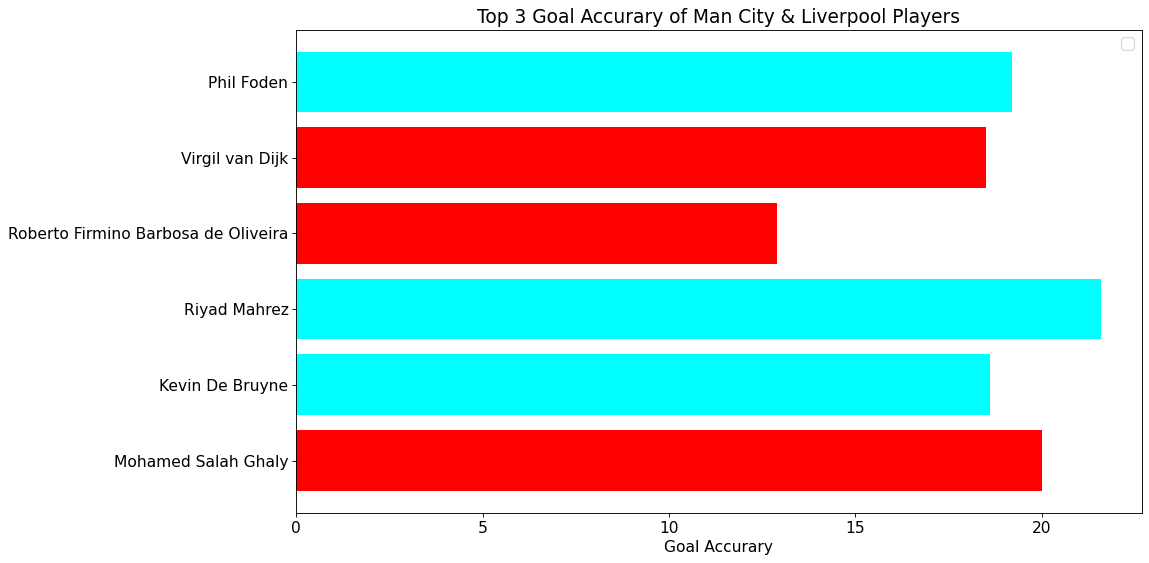

In [ ]:
# set properties in figure
fig = plt.figure(figsize=(30, 8), dpi=80)
plt.rcParams['font.size'] = '14'

# create bar 2
plt.subplot(122)
plt.barh(df3['PLAYER'],df3['GA%'], color=('red','aqua','aqua','red','red','aqua'))

# set properties in chart 2
plt.legend()
plt.title('Top 3 Goal Accurary of Man City & Liverpool Players')
plt.xlabel('Goal Accurary')
plt.ylabel('')

# show chart
plt.show()

###**สรุป**



จากกราฟจะเห็นว่า เปอร์เซ็นต์การยิงเข้าประตูของนักเตะ Man City ที่มากที่สุดคือ Riyad Mahrez อยู่ที่ 21.6% และน้อยที่สุดคือ Kevin De Bruyne อยู่ที่ 18.6%

ส่วนเปอร์เซ็นต์การยิงเข้าประตูของนักเตะ Livepool ที่มากที่สุดคือ Mohamed Salah อยู่ที่ 20% และน้อยที่สุดคือ Roberto Firmino อยู่ที่ 12.9%







---



##**Boxplot**

กราฟแสดงเปอร์เซ็นต์การยิงตรงกรอบของนักเตะทั้งหมดใน 6 สโมสรใหญ่

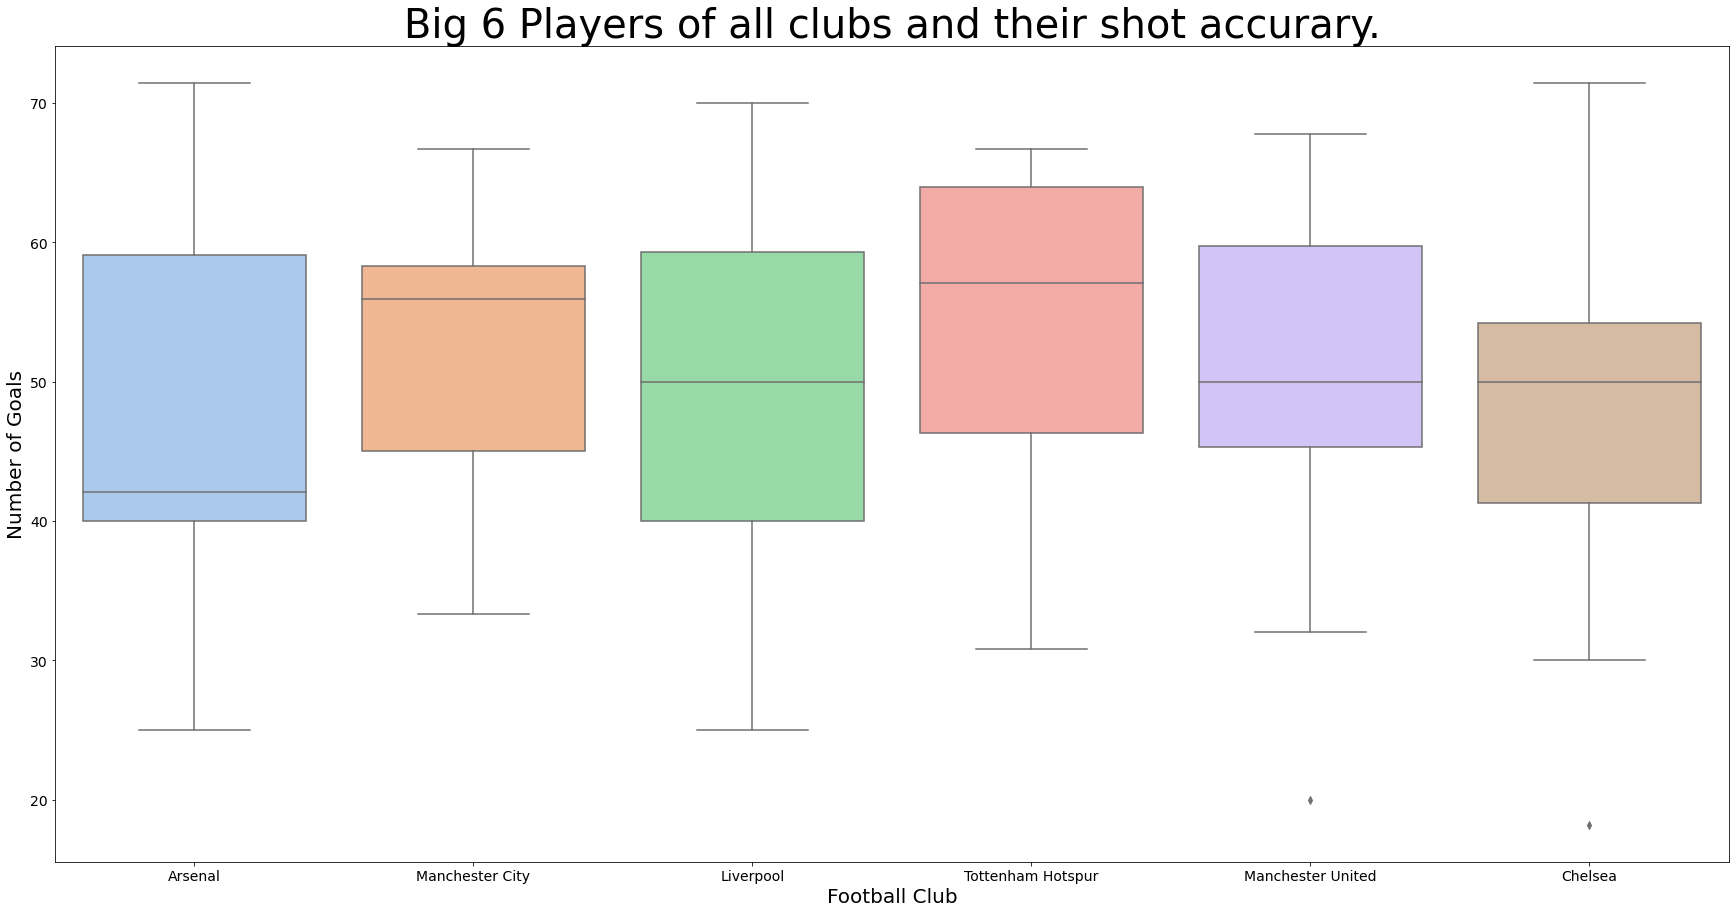

In [ ]:
teams = ('Manchester United', 'Arsenal', 'Manchester City', 'Chelsea', 'Liverpool', 'Tottenham Hotspur')
data_teams = df.loc[df['TEAM'].isin(teams) & df['SA%']]

plt.rcParams['figure.figsize'] = (30, 15)
ax = sns.boxplot(x = data_teams['TEAM'], y = data_teams['SA%'], palette = 'pastel')
ax.set_xlabel(xlabel = 'Football Club', fontsize = 20)
ax.set_ylabel(ylabel = 'Number of Goals', fontsize = 20)
ax.set_title(label = 'Big 6 Players of all clubs and their shot accurary.', fontsize = 40)
plt.show()

### สรุป







จากกราฟจะเห็นได้ว่า นักเตะของสโมสร Tottenham Hotspur  กับ Manchester City จะมีค่าเฉลี่ยเปอร์เซ็นต์การยิงตรงกรอบมากที่สุดและต่างกันเล็กน้อย แต่กลับกันนักเตะของสโมสร Arsenal จะมีค่าเฉลี่ยเปอร์เซ็นต์การยิงตรงกรอบน้อยที่สุด และสโมสรที่เหลือจะมีจะมีเปอร์เซ็นต์การยิงตรงกรอบเฉลี่ยเท่าๆกัน